In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.empty((100,2))
x[:,0]=np.random.uniform(0.,100.,size=100)
x[:,1]=0.75 * x[:,0]+ 3. + np.random.normal(0,10.,size=100)

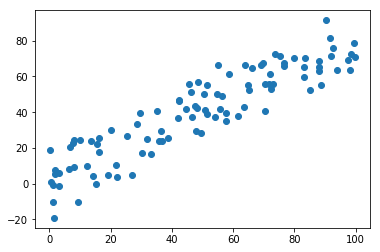

In [3]:
plt.scatter(x[:,0],x[:,1])
plt.show()

### demean  
均值归零化

In [4]:
def demean(x):
    return x - np.mean(x,axis=0)

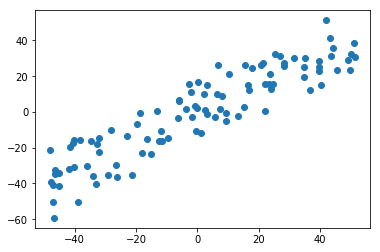

In [5]:
x_demean=demean(x)
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.show()

### 梯度上升法

In [6]:
def f(w,X):
    return np.sum((X.dot(w)**2)) / len(X) 

In [7]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

In [14]:
def direction(w):
    return w/np.linalg.norm(w)

def gradient_descent_2(X,inite_w,eta,n_iters=1e4,epsilon= 1e-8):
    '''
    n_iters  最大循环次数
    '''
    w=direction(inite_w)
    i_iters=0
    
    while i_iters<n_iters:
        gradient=df_math(w,X)
        lastw=w
        w= w + eta*gradient
        w=direction(w)   #每次w都要归于单位向量
                
        if(abs(f(w,X)-f(lastw,X))<epsilon):
            break
            
        i_iters+=1
    return w

In [10]:
initial_w=np.random.random(x.shape[1])  #  不能从0向量开始
initial_w

array([ 0.80909323,  0.14125515])

In [12]:
eta=0.001

In [15]:
#  不能使用标准化处理
theta=gradient_descent_2(x_demean,initial_w,eta)
theta

array([ 0.77673777,  0.62982413])

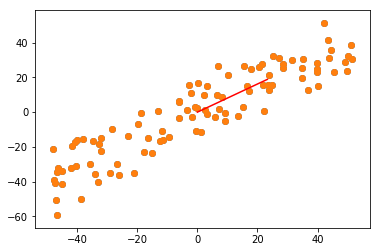

In [17]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.plot([0,theta[0]*30],[0,theta[1]*30],color='r')
plt.show()

In [18]:
#获取前n个主成分
def f(w,X):
    return np.sum((X.dot(w)**2)) / len(X) 

def df(w,X):
    return X.T.dot(X.dot(w))*2./len(X)

def direction(w):
    return w/np.linalg.norm(w)

def gradient_descent_2(X,inite_w,eta,n_iters=1e4,epsilon= 1e-8):
    '''
    n_iters  最大循环次数
    '''
    w=direction(inite_w)
    i_iters=0
    
    while i_iters<n_iters:
        gradient=df(w,X)
        lastw=w
        w= w + eta*gradient
        w=direction(w)   #每次w都要归于单位向量
                
        if(abs(f(w,X)-f(lastw,X))<epsilon):
            break
            
        i_iters+=1
    return w

In [19]:
initial_w=np.random.random(x.shape[1])  #  不能从0向量开始
eta=0.01
w=gradient_descent_2(x,initial_w,eta)
w

array([ 0.77090802,  0.63694649])

In [20]:
x2=np.empty(x.shape)
for i in range(len(x)):
    x2[i] = x[i] - x[i].dot(w) * w

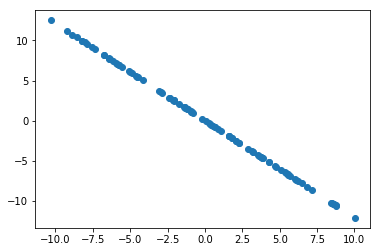

In [22]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()